# Module 09: *k*-Nearest Neighbors

**Student Name**: [Yanzhen Chen]

**Date**: [10.29]

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [148]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [150]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]



In [152]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [155]:
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Sepal Features:
Length: Mean is 5.84 cm with a standard deviation of 0.83. Most sepal lengths are concentrated between 5.1 cm and 6.4 cm, with a minimum of 4.3 cm and a maximum of 7.9 cm.
Width: Mean is 3.06 cm with a standard deviation of 0.44. Most sepal widths are concentrated between 2.8 cm and 3.3 cm, with a minimum of 2.0 cm and a maximum of 4.4 cm.

Petal Features:
Length: Mean is 3.76 cm with a standard deviation of 1.77. Petal length shows a large range, from 1.0 cm to 6.9 cm.
Width: Mean is 1.20 cm with a standard deviation of 0.76. The range of petal width is from 0.1 cm to 2.5 cm.

Observations:
Petal length and width show significant variability, making them effective for distinguishing between different iris species, while sepal features are more concentrated.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

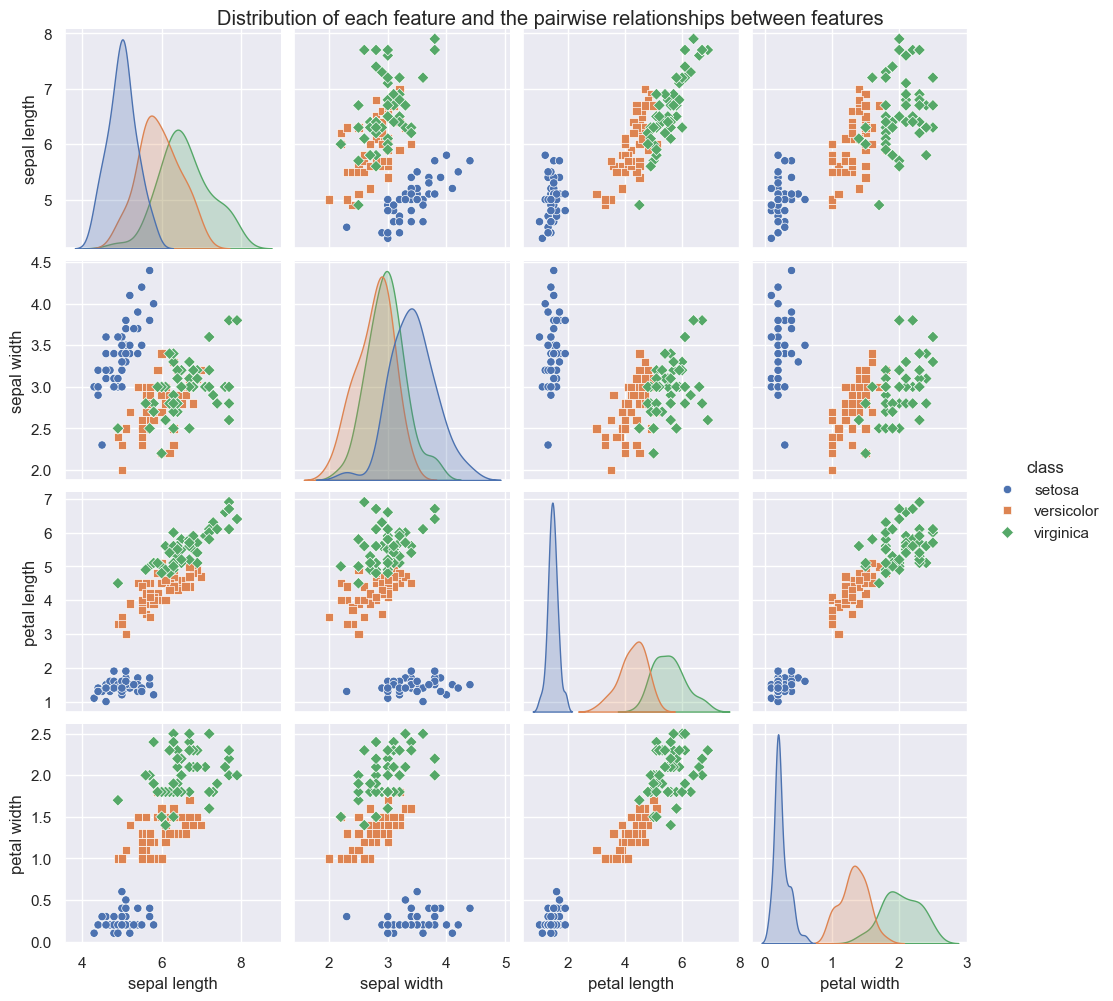

In [159]:
sns.pairplot(df, hue='class', markers=["o", "s", "D"])
plt.suptitle('Distribution of each feature and the pairwise relationships between features', y=1)
plt.show()

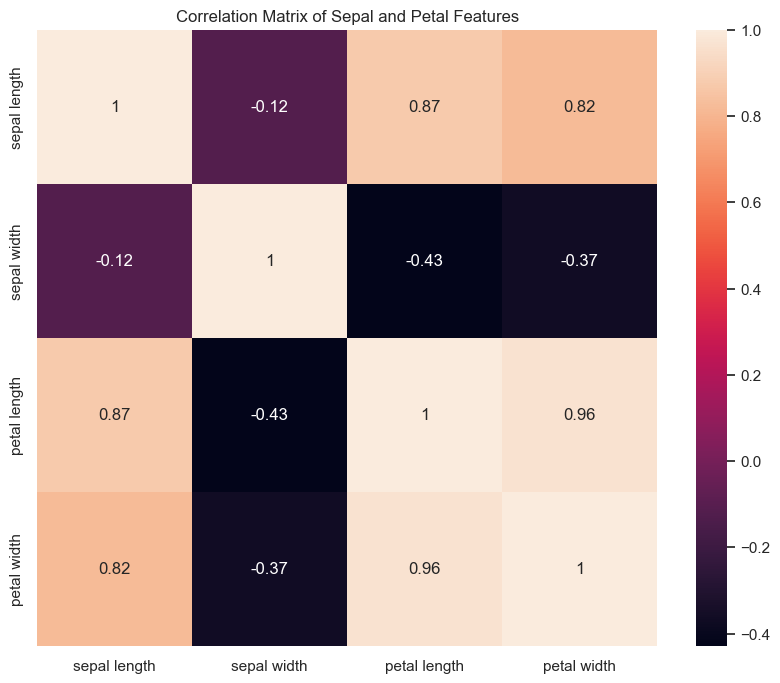

In [160]:
# Compute correlation matrix
correlation_matrix = df.drop(columns=['class']).corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Sepal and Petal Features')
plt.show()


From the scatter matrix, we can see that there is a strong linear relationship between petal length and width, and the distribution of different categories is more dispersed.
Through the heat map of the correlation matrix, we observe that the correlation coefficient between the petal features is close to 0.96, which indicates that the petal length and width play a key role in distinguishing the different categories.


Strong Positive Correlation: The high positive correlation between Petal Length and Petal Width (0.96) indicates that these two features contribute the most to the classification model, especially when the variations between them are significant across different species.

Moderate Correlation: The moderate positive correlations between Sepal Length with Petal Length and Petal Width suggest that these features can still play a supportive role in distinguishing some species.

Weak Correlation: Sepal Width shows weaker correlations with the other features, indicating that it might be less significant in classification compared to petal features.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

In [164]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=7,
                                                    stratify=y
                                        ) 

#build the k-nn model, experiment with different values of k and plot the results

k_values = range(1, 21)  
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # predict the labels for the test set
    y_pred = knn.predict(X_test)
    
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    
print(accuracies)

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888]


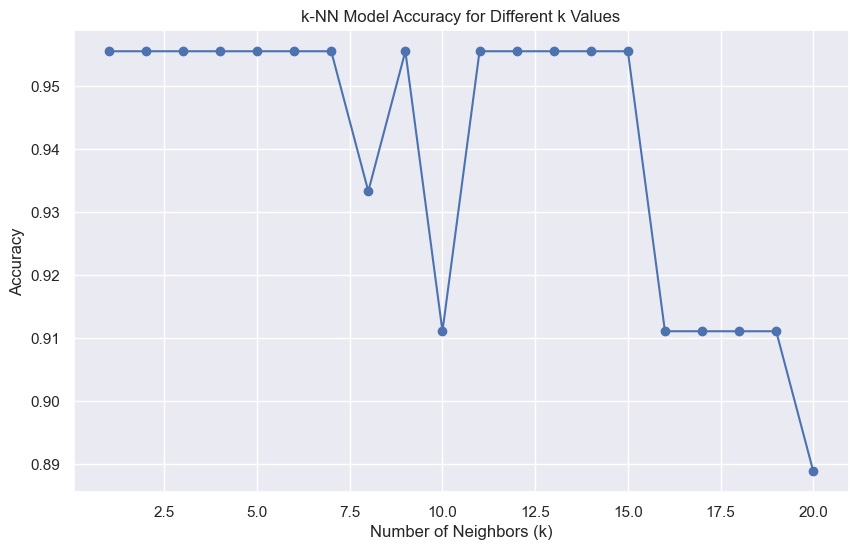

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Model Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


The accuracy of the model is 0.9556 for all k = 1 to k = 7. This indicates that the model performs very well on the test set at these k values. At k = 8, the accuracy drops slightly to 0.9333, while at k = 10 and larger k values, the accuracy drops to 0.9111. As the k values increase to 16 and above, the accuracy further drops to 0.8889.

The recommended k-value k = 5. This k-value is recommended because it performs well in terms of accuracy and is somewhat resistant to the effects of noise.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [173]:
recommended_k = 5

knn = KNeighborsClassifier(n_neighbors=recommended_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Classification Report Explanation：

Setosa Class: Precision, recall, and F1 score are all 1.00, indicating the model correctly classified all Setosa samples.

Versicolor and Virginica Classes: Precision and recall are both 0.93, with an F1 score of 0.93, indicating good performance for these two classes.

Accuracy: 0.96, meaning the model correctly classified 96% of the samples in the test set.
Macro Average and Weighted Average: Both are 0.96, indicating balanced performance across all classes.


Conclusion：
The model performs well at the recommended k value (k = 5), with high classification accuracy and balanced results across the classes.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

4.1

Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions. 

Example: In an image classification task, suppose we have 100 images, 90 of which are cats and 10 of which are dogs. If our model predicts all images as cats, then the accuracy of the model is 90%.

Precision is a metric that measures how often a machine learning model correctly predicts the positive class. You can calculate precision by dividing the number of correct positive predictions (true positives) by the total number of instances the model predicted as positive (both true and false positives).

Example: In an email spam classification system, we want the system to identify spam emails correctly. However, if normal emails are mistakenly labeled as spam (false positives), users may miss important emails. So in this scenario, precision rate is important.

Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances. The latter includes true positives (successfully identified cases) and false negative results (missed cases).

Example: In healthcare, such as cancer screening, we want to minimize missed diagnoses. Recall is therefore crucial. It is better to do further tests on people who do not have the disease (false positives) than to miss any patient who actually has the disease (false negatives).

4.2

k-Fold Cross-Validation: It divides the dataset into k equal subsets and performs k rounds of training and testing. The average of the k results is used to assess the model's overall performance.

How it works:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups.
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. Summarize the skill of the model using the sample of model evaluation scores

Example: 
Suppose we use 5-fold cross-validation, the dataset will be divided into 5 parts:
1. The 1st fold is used as the validation set, and the remaining 4 folds are used as the training set.
2. The 2nd fold is used as the validation set, and the remaining 4 folds are used as the training set.
3. The 3rd fold is used as the validation set, and the remaining 4 folds are used as the training set.
4. The 4th fold is used as the validation set, and the remaining 4 folds are used as the training set.
5. The 5th fold is used as the validation set, and the remaining 4 folds are used as the training set.

Each iteration yields an evaluation result, and finally, the average of the 5 results is taken as the overall evaluation.

## Resources / References
Share any resources that were helpful in your response for question 4. 

4.1 resource:

https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall

4.2 resource:

https://machinelearningmastery.com/k-fold-cross-validation/